# Importing the Libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/Dataset/Fuel efficeny/autos_mpg.csv')

# EDA and Pre-processing.

In [ ]:
le=LabelEncoder()
sc=StandardScaler()

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.shape

(398, 9)

There are 389 columns and 9 rows in the data.

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


1) The data belongs to vintage cars as the year of manufacturing is between 1970-1982.

2) There are vehicles have 3 cyclinders to a range of 8 cyclinders.

3) The mpg column is our dependent variable('y').

4) The displacement column is the CC of the vehicle which ranges from 68CC uptill 455 CC.

5) The weight of the car would play an important role as more the weight of the car more the fuell would be required to run it.

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

There are no null values in the data.

In [ ]:
df=df.drop('car_name',axis=1)

We would drop the 'car_name' as it has very low influence on the dependent variable.

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

There is some missing values in the form of object in horsepower feature.

In [ ]:
df.isin(['?']).sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

We would replace the '?' in the horsepower column with the median or mean value according to the distplot.

In [ ]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)

Convering '?' into null value and then filling it.

<ipython-input-13-0df883a519cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['horsepower'])


<Axes: xlabel='horsepower', ylabel='Density'>

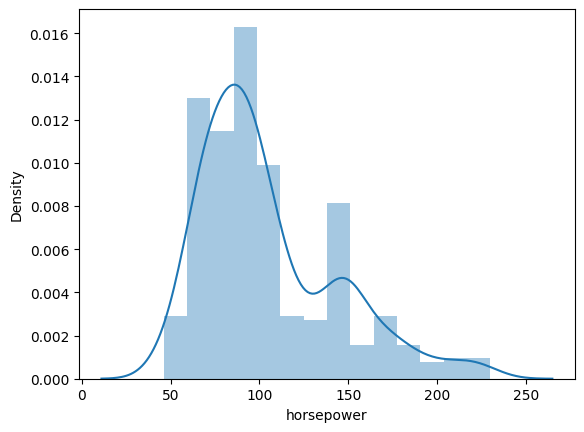

In [ ]:
sns.distplot(df['horsepower'])

As the data is skeewed we would fill the missing values with 'median' value of the feature.

In [ ]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [ ]:
df['horsepower']=df['horsepower'].astype(float)

<Axes: ylabel='horsepower'>

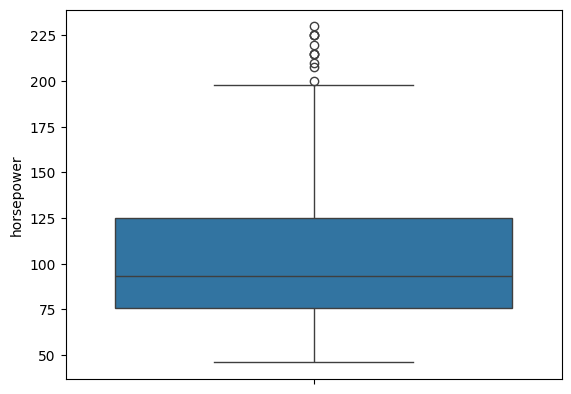

In [ ]:
sns.boxplot(df['horsepower'])

There are some outliers in the columns but we will not treat them as they are important for our dataset.

<Axes: ylabel='displacement'>

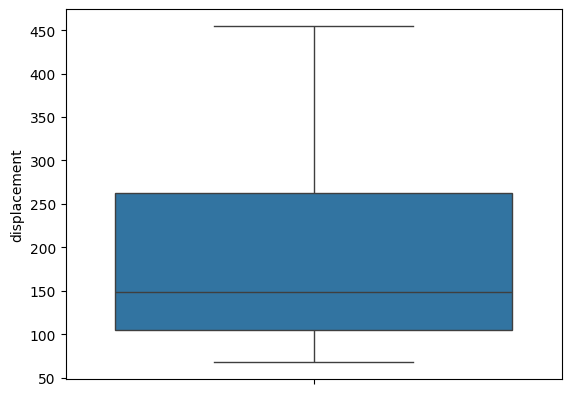

In [ ]:
sns.boxplot(df['displacement'])

There are no outliers in the data.

<Axes: xlabel='count', ylabel='cylinders'>

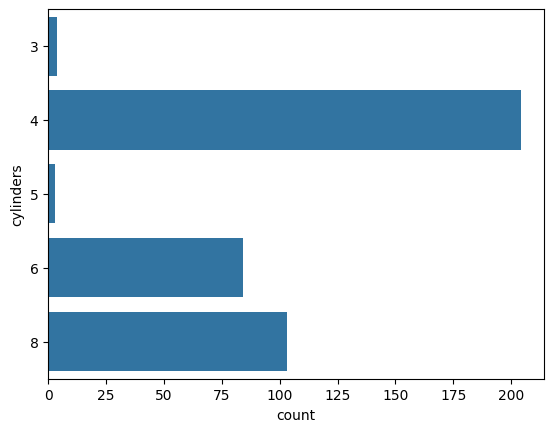

In [ ]:
sns.countplot(y=df['cylinders'])

Most cars consist of 4 cylinders.

In [ ]:
df['model_year']=le.fit_transform(df['model_year'])

Label Encoding the feature because it consists of year of the project so the values in the features do not consist of any actual mathematical meaning.

In [ ]:
z=df[['weight']]
df['weight']=sc.fit_transform(z)


Standardsing the weight column as the values are very high compared to other

In [ ]:
df['mpg'] = df['mpg'].astype(float)
correlation_matrix = df.corr()
z= correlation_matrix['mpg']
print(z)

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.773453
weight         -0.831741
acceleration    0.420289
model_year      0.579267
origin          0.563450
Name: mpg, dtype: float64


From the above co-relation matrix, we can say that all the columns are highly influenced with each another.

<Figure size 1500x1000 with 0 Axes>

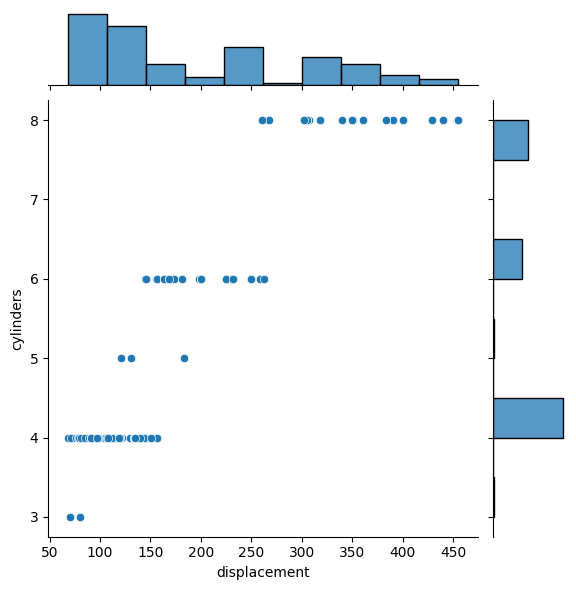

In [ ]:
plt.figure(figsize=(15,10))
sns.jointplot(x=df['displacement'],y=df['cylinders'])


We can see that as the number of cylinders increase,more the displacement increases.Hence we can say that Number of cylienders is positively co-related with the displacement of the vehicle.

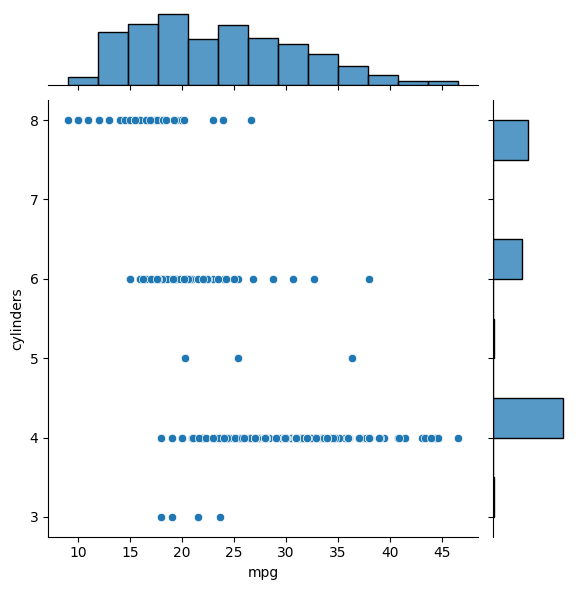

In [ ]:
sns.jointplot(y=df['cylinders'],x=df['mpg'])

We can see that as the number of cylinders increase the mileage of the vhicles decreases.We can say that the 'y' variable is negatively co-related with the number of cylinders.

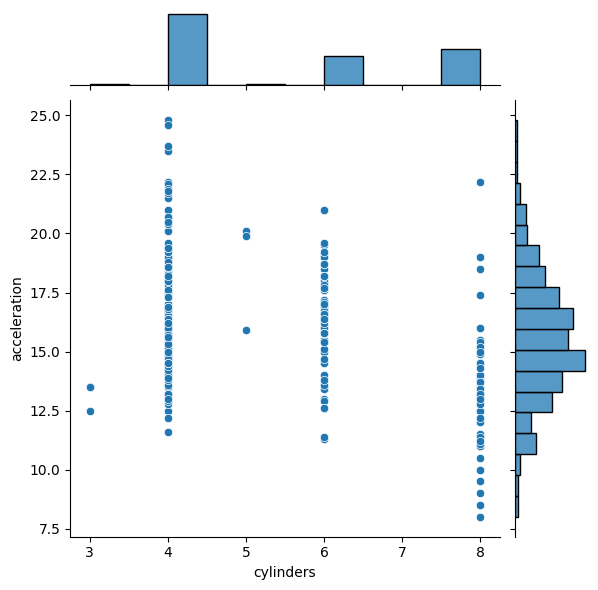

In [ ]:
sns.jointplot(x=df['cylinders'],y=df['acceleration'])

The acceleration of the vehicle doesnt have any direct relation with the number of cyclinders in the vehicle.4 cylinder vehicles have the best accelaration in all of the others.

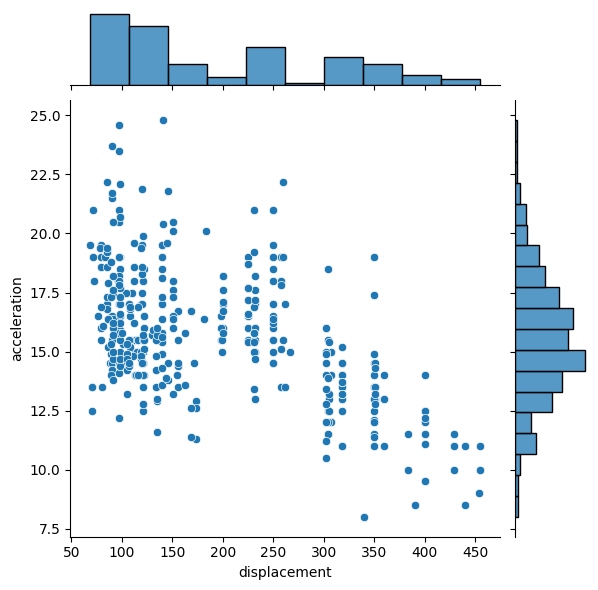

In [ ]:
sns.jointplot(x=df['displacement'],y=df['acceleration'])

We can see lower the displacement ,higher is the acceleration in the vehicle.

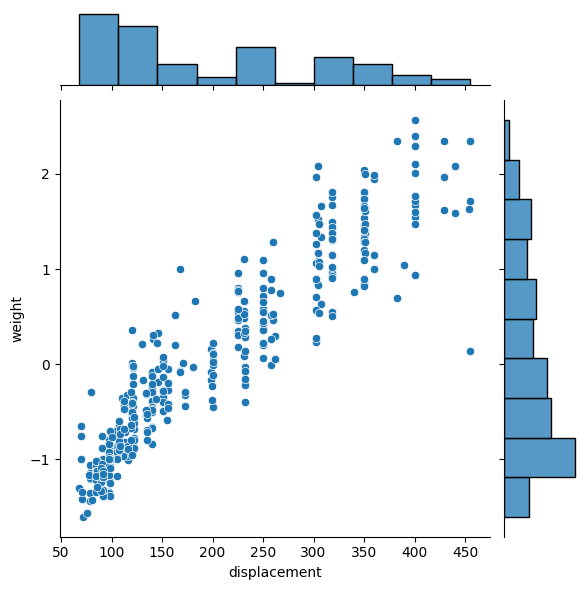

In [ ]:
sns.jointplot(x=df['displacement'],y=df['weight'])


The displacement of the vehicle increases as the weight of the vehicle increases.As the weight of the vehicle is low and displacemnt was high from the above table we can say that the acceleration also decreased in higher displacment vehicles because their weights were heavy.

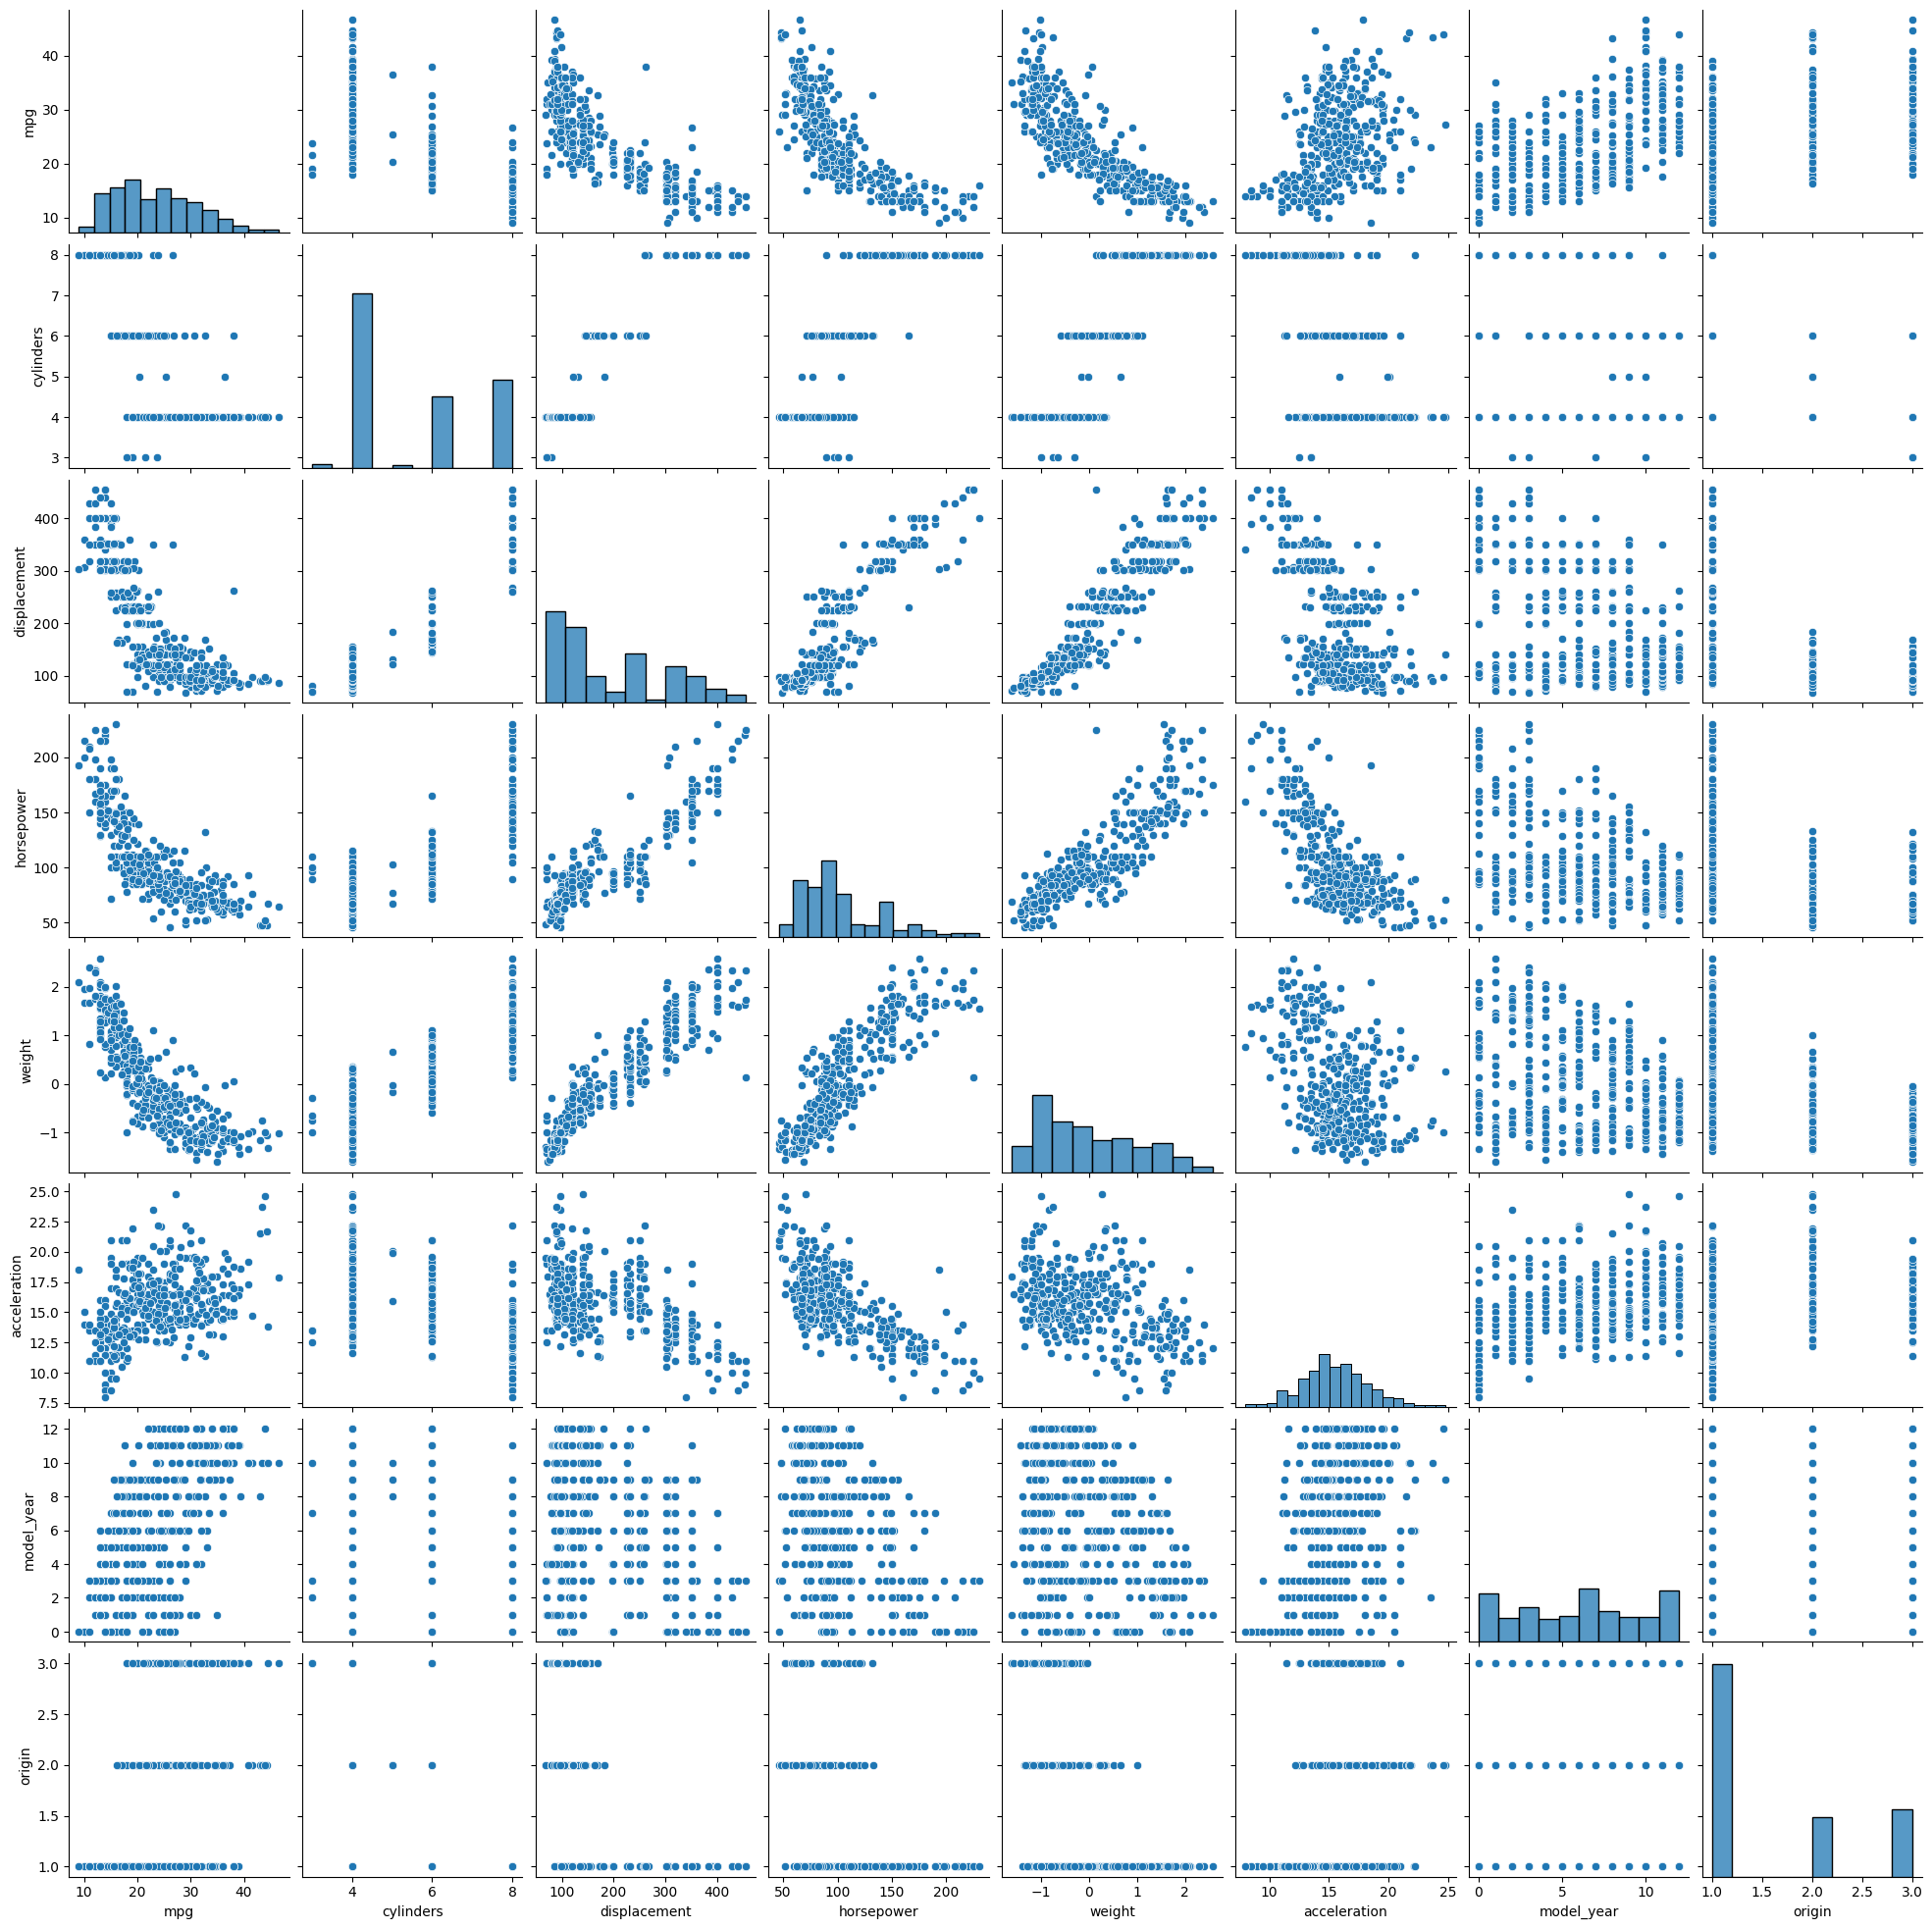

In [ ]:
sns.pairplot(df)

From the above pairplot we can say that the data is linear and the data is of a normal range.So the following algorithims can be used-

1) Linear Regression- The data is linear and of a normal range we would use Linear Regression algorithim.

2) Support Vector Machine- The data is linear and of a normal range so we can use linear kernel to find predictions in the data.

3) ANN-To achieve high level of accuracy with continous training of the data.

# Model Selection

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,:1]

In [ ]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,0.630870,12.0,0,1
1,8,350.0,165.0,0.854333,11.5,0,1
2,8,318.0,150.0,0.550470,11.0,0,1
3,8,304.0,150.0,0.546923,12.0,0,1
4,8,302.0,140.0,0.565841,10.5,0,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,-0.213324,15.6,12,1
394,4,97.0,52.0,-0.993671,24.6,12,2
395,4,135.0,84.0,-0.798585,11.6,12,1
396,4,120.0,79.0,-0.408411,18.6,12,1


In [ ]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


As the dataset is small we would keep the test size 30% of the data.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=120)

# Linear Regression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
mean_squared_error(y_test,y_pred)

9.550999301388991

In [ ]:
r2_score(y_test,y_pred)*100

84.14455650242346

We got 84% accuracy using the LinearRegression algorithim.

# Support Vector Machine

Hyper-Parameter Tuning.

In [ ]:
param={'kernel':['linear','rbf','poly','sigmoid']}
gsv=GridSearchCV(estimator=svr,param_grid=param,scoring='accuracy',cv=5)

In [ ]:
gsv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sk

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [ ]:
gsv.best_params_

{'kernel': 'linear'}

In [ ]:
gsv.best_score_

nan

**Training the Model**

In [ ]:
svr=SVR(kernel='linear')

In [ ]:
svr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred=svr.predict(x_test)

In [ ]:
mean_squared_error(y_test,y_pred)

10.274199136023375

In [ ]:
r2_score(y_test,y_pred)*100

82.94398536283238

Using Artificial Neural Network we get an accuracy of 82%.

# ANN

In [ ]:
ann=Sequential()
nm=MinMaxScaler()

In [ ]:
# Normalisation of all the features
x_train=nm.fit_transform(x_train)
x_test=nm.fit_transform(x_test)

In [ ]:
x_train.shape

(278, 7)

In [ ]:
ann.add(Dense(7))

ann.add(Dense(32,activation='relu'))
ann.add(Dense(16,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(4,activation='relu'))

ann.add(Dense(1))

In [ ]:
# Using 'mean_squared_error' as a feedback layer for regression in deep learning
ann.compile(loss='mse')

In [ ]:
ann.fit(x_train,y_train,epochs=500)

Epoch 1/500
9/9 [==============================] - 0s 4ms/step - loss: 7.9375
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 7.8735
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 7.8190
Epoch 4/500
9/9 [==============================] - 0s 3ms/step - loss: 7.6894
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 7.9060
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 7.7473
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 7.6234
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 7.9716
Epoch 9/500
9/9 [==============================] - 0s 3ms/step - loss: 7.7780
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 7.7368
Epoch 11/500
9/9 [==============================] - 0s 3ms/step - loss: 7.6307
Epoch 12/500
9/9 [==============================] - 0s 3ms/step - loss: 7.8211
Epoch 13/500
9/9 [==============================] - 0s 3ms/st

In [ ]:
ann.evaluate(x_test,y_test)

4/4 [==============================] - 0s 7ms/step - loss: 8.0862


8.086212158203125

In [ ]:
y_pred=ann.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
r2_score(y_test,y_pred)*100

86.57622500448059

Using Artificial Neural Network we get an accuracy of 86%.

As we get the best accuracy from ANN we will go ahead with it for better accuracy in our model.